### Histograms

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

In [2]:
from scipy import stats 

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [15]:
dataset1 = randn(100)

(array([ 1.,  5., 16., 15., 15., 21., 13.,  8.,  2.,  4.]),
 array([-2.43992244, -1.95830005, -1.47667766, -0.99505527, -0.51343288,
        -0.03181049,  0.4498119 ,  0.93143429,  1.41305668,  1.89467907,
         2.37630146]),
 <a list of 10 Patch objects>)

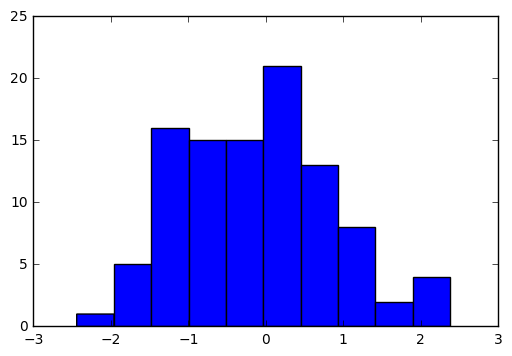

In [16]:
plt.hist(dataset1)

(array([ 4.,  2.,  4., 12., 14., 12., 12.,  9.,  7.,  4.]),
 array([-2.5915608 , -2.1521264 , -1.71269201, -1.27325762, -0.83382322,
        -0.39438883,  0.04504557,  0.48447996,  0.92391436,  1.36334875,
         1.80278314]),
 <a list of 10 Patch objects>)

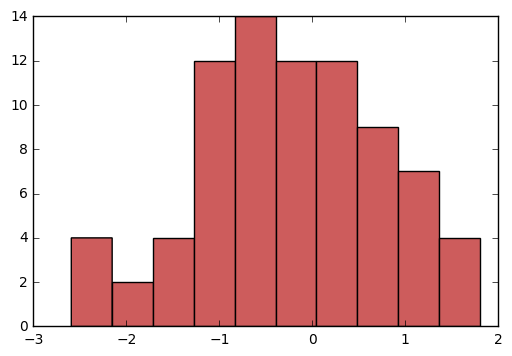

In [17]:
dataset2 = randn(80)

plt.hist(dataset2, color='indianred')

(array([0.05689131, 0.17067394, 0.05689131, 0.05689131, 0.11378263,
        0.11378263, 0.28445657, 0.3982392 , 0.05689131, 0.73958708,
        0.28445657, 0.3982392 , 0.51202182, 0.17067394, 0.22756526,
        0.28445657, 0.22756526, 0.17067394, 0.11378263, 0.11378263]),
 array([-2.5915608 , -2.3718436 , -2.1521264 , -1.93240921, -1.71269201,
        -1.49297481, -1.27325762, -1.05354042, -0.83382322, -0.61410602,
        -0.39438883, -0.17467163,  0.04504557,  0.26476276,  0.48447996,
         0.70419716,  0.92391436,  1.14363155,  1.36334875,  1.58306595,
         1.80278314]),
 <a list of 20 Patch objects>)

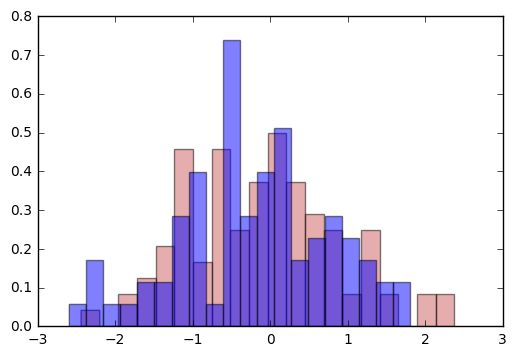

In [18]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5, bins=20)

In [19]:
data1 = randn(1000)
data2 = randn(1000)

C:\Users\Алексей\Anaconda\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


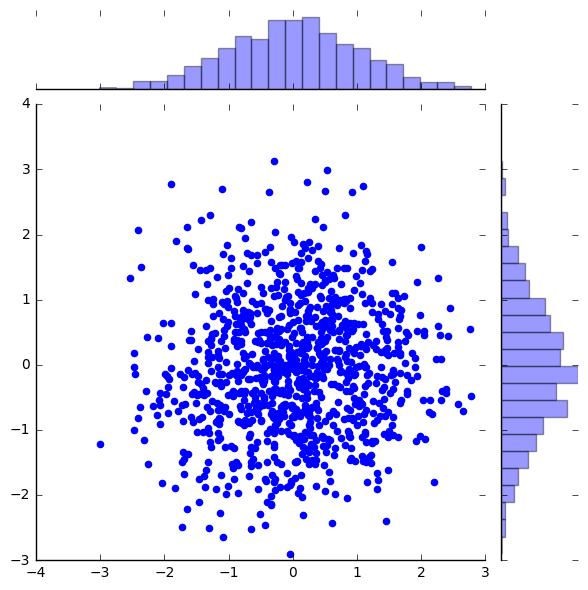

In [20]:
sns.jointplot(data1, data2)

C:\Users\Алексей\Anaconda\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


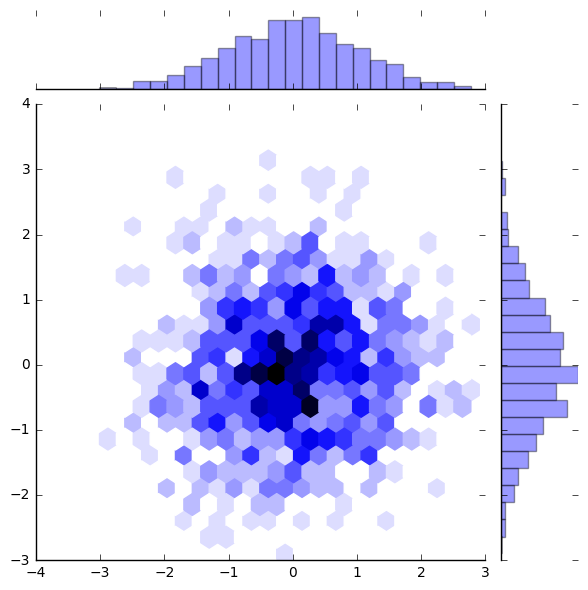

In [21]:
sns.jointplot(data1,data2,kind='hex')

### Kernel Density Estimation Plots

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

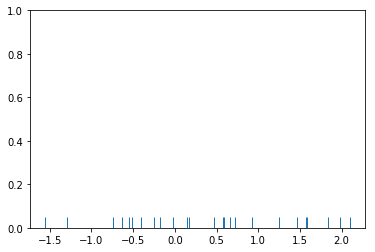

In [3]:
sns.rugplot(dataset)

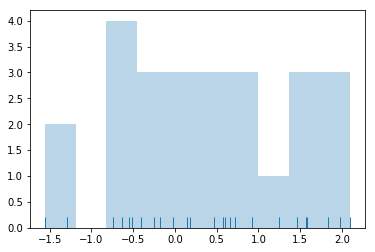

In [4]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

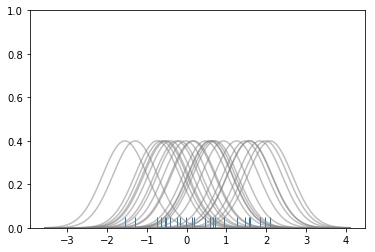

In [5]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale 4 plotting
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

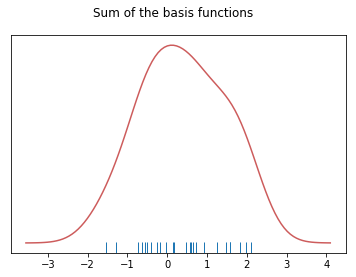

In [6]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

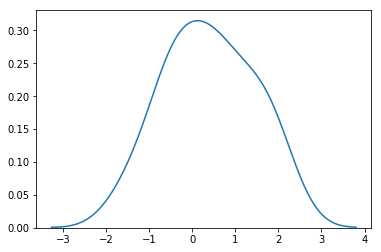

In [7]:
sns.kdeplot(dataset)

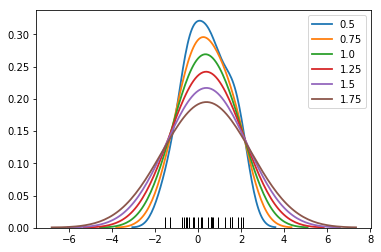

In [8]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw,lw=1.8,label=bw)

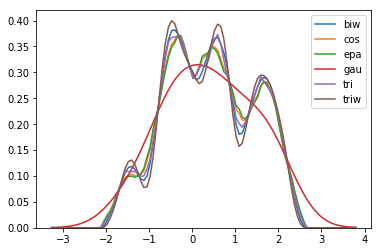

In [9]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=False)

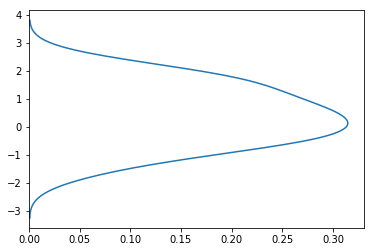

In [10]:
sns.kdeplot(dataset,vertical=True)

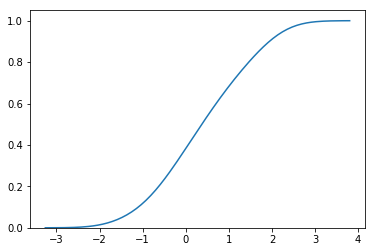

In [11]:
sns.kdeplot(dataset, cumulative=True)

In [12]:
mean = [0,0]

In [15]:
cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

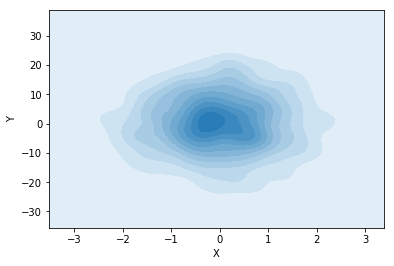

In [18]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

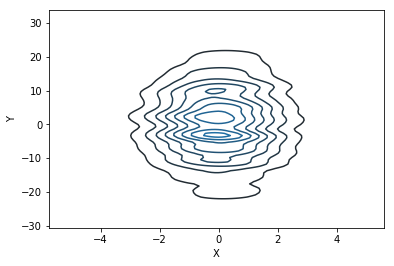

In [21]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

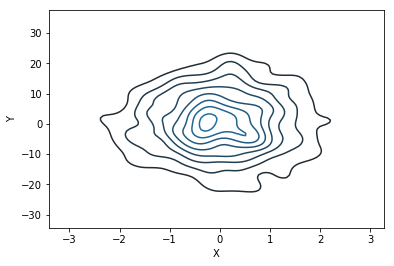

In [22]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

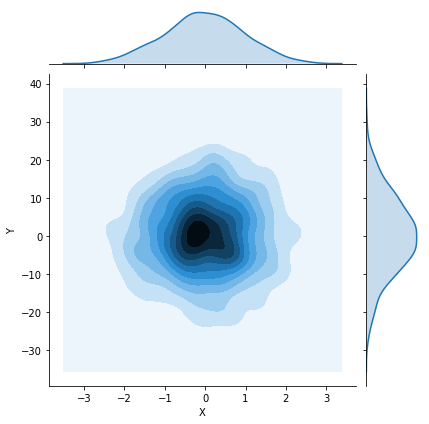

In [23]:
sns.jointplot('X','Y',dframe,kind='kde')

### Combining Plot Styles

In [24]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
dataset = randn(100)

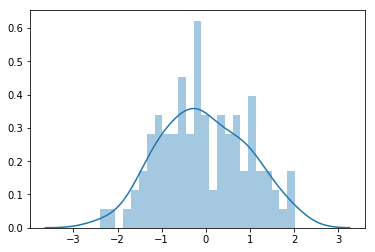

In [26]:
sns.distplot(dataset, bins=25)

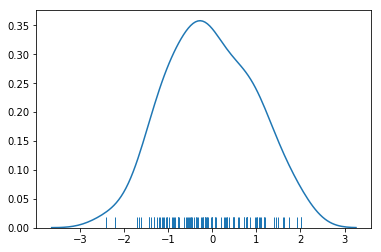

In [30]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

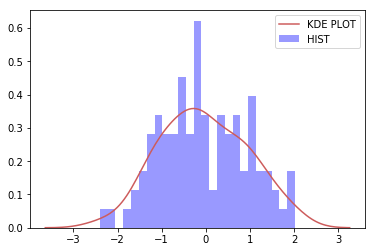

In [31]:
sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred', 'label':'KDE PLOT'},
             hist_kws={'color':'blue', 'label':'HIST'})

In [34]:
from pandas import Series

ser1 = Series(dataset, name='My_data')

ser1


0    -1.650664
1    -1.428189
2     0.475627
3    -0.340829
4     0.286646
5    -0.861792
6     1.021091
7    -0.518615
8    -0.323706
9    -0.743205
10   -0.477518
11    0.501098
12    0.000804
13   -0.037707
14   -0.262129
15    0.204506
16   -0.102846
17    1.182561
18   -0.902713
19    0.710392
20    0.786491
21   -0.110124
22   -0.468689
23   -1.384479
24   -0.893050
25   -0.764135
26    1.001535
27   -0.130408
28    1.402328
29   -1.050608
        ...   
70    0.345084
71   -1.314863
72   -1.611804
73    1.618707
74   -0.637938
75   -0.006561
76    1.082156
77    0.724422
78    0.488584
79    0.073903
80    0.968894
81   -0.766944
82   -1.023807
83    1.096568
84   -0.574846
85   -0.462758
86   -0.554165
87   -0.363742
88    0.314740
89   -0.831488
90   -1.245718
91    0.388854
92    0.594351
93   -1.106034
94   -0.198101
95   -0.784121
96   -0.223674
97   -0.154379
98   -0.504682
99   -0.171130
Name: My_data, Length: 100, dtype: float64

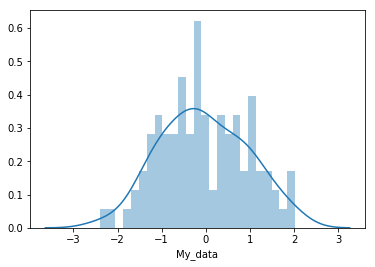

In [35]:
sns.distplot(ser1, bins=25)

### Box and Violin Plots

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data1 = randn(100)
data2 = randn(100)

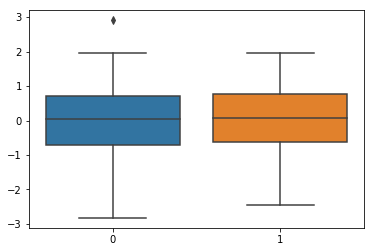

In [17]:
sns.boxplot(data=[data1,data2])

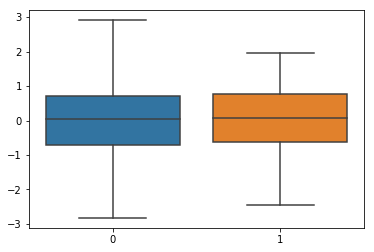

In [18]:
sns.boxplot(data=[data1,data2],whis=np.inf)

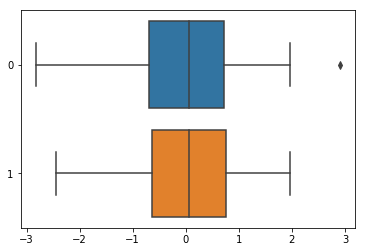

In [20]:
sns.boxplot(data=[data1,data2],orient='h')

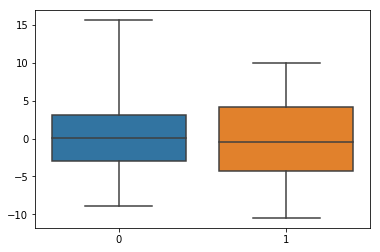

In [21]:
data1 = stats.norm(0,5).rvs(100) # normal dist

data2 = np.concatenate([stats.gamma(5).rvs(50)-1,  # gamma dist
                        -1*stats.gamma(5).rvs(50)]) # another gamma dist

sns.boxplot(data=[data1,data2], whis=np.inf)

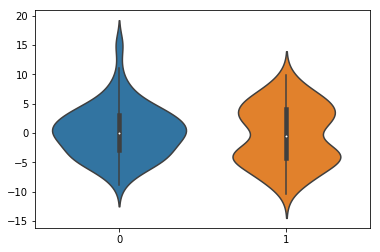

In [22]:
sns.violinplot(data=[data1, data2])

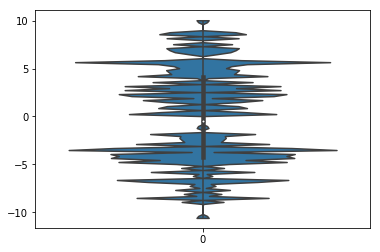

In [24]:
sns.violinplot(data=[data2], bw=0.01)

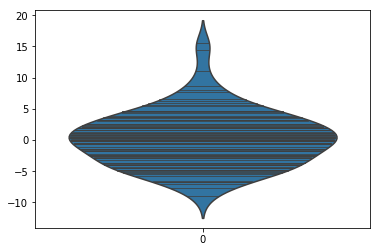

In [26]:
sns.violinplot(data=[data1], inner='stick')

### Regression Plots

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


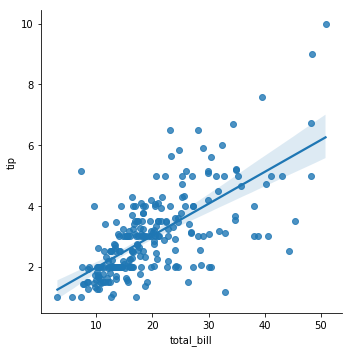

In [4]:
sns.lmplot('total_bill','tip',tips)

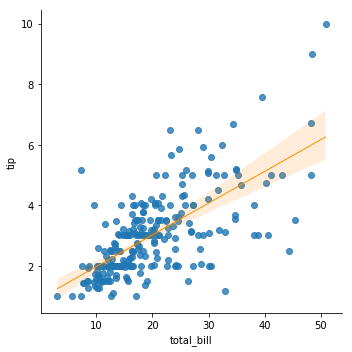

In [21]:
sns.lmplot('total_bill','tip',tips,
           scatter_kws={'marker':'o'},
           line_kws={'linewidth':1,'color':'darkorange'})

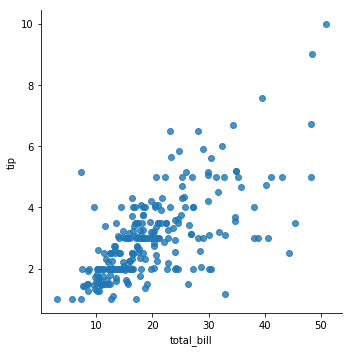

In [22]:
sns.lmplot('total_bill', 'tip', tips,fit_reg=False)

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips['tip_pct'] = 100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


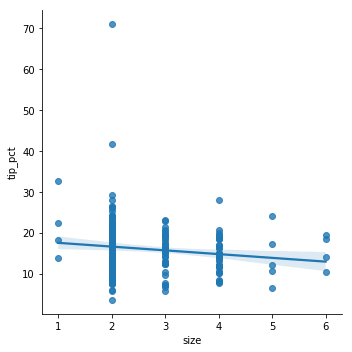

In [31]:
sns.lmplot('size','tip_pct', tips)

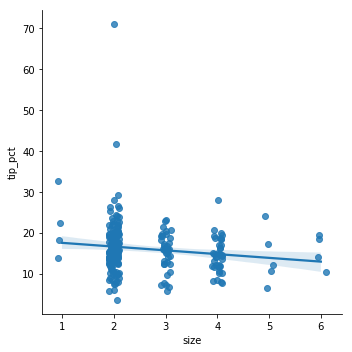

In [32]:
sns.lmplot('size','tip_pct',tips,x_jitter=.1)

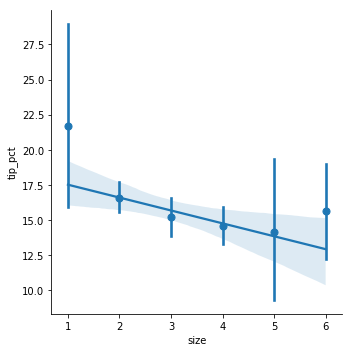

In [33]:
sns.lmplot('size','tip_pct',tips,x_estimator=np.mean)

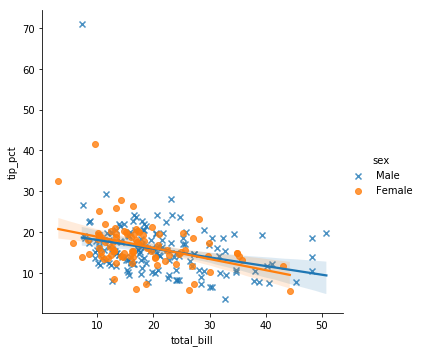

In [34]:
sns.lmplot('total_bill','tip_pct',tips,hue='sex',markers=['x','o'])

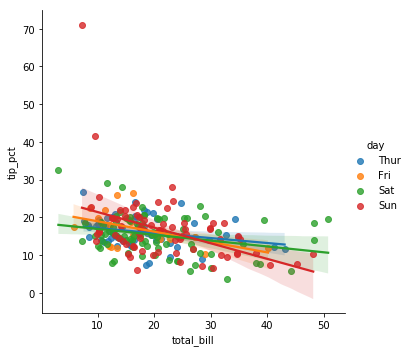

In [35]:
sns.lmplot('total_bill','tip_pct',tips,hue='day')

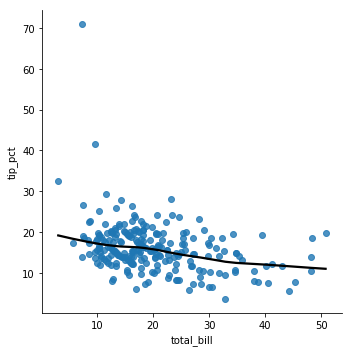

In [37]:
sns.lmplot('total_bill','tip_pct',tips,lowess=True,
           line_kws={'color':'black'})

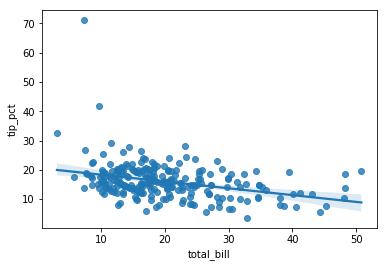

In [38]:
sns.regplot('total_bill','tip_pct',tips)

### Heatmaps and Clustered Matrices

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
f_dframe = sns.load_dataset('flights')

In [5]:
f_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
f_dframe = f_dframe.pivot('month','year','passengers')
f_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


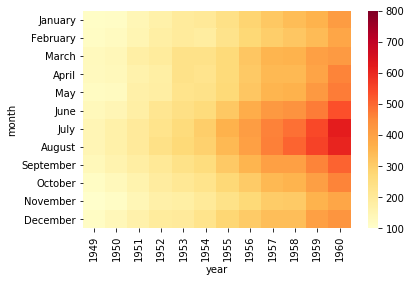

In [41]:
sns.heatmap(f_dframe, cmap='YlOrRd', vmin=100, vmax=800)

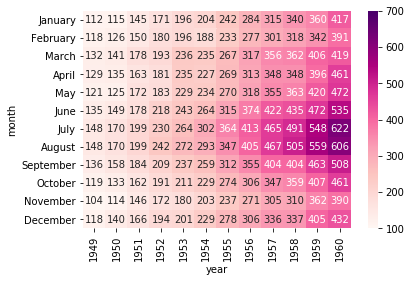

In [42]:
sns.heatmap(f_dframe,annot=True,fmt='d', cmap='RdPu', vmin=100, vmax=700)

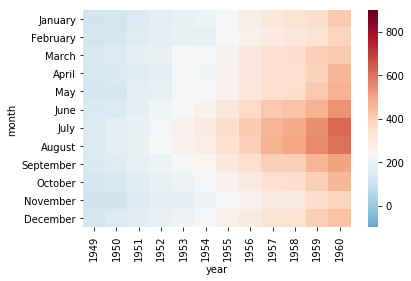

In [39]:
sns.heatmap(f_dframe,center=f_dframe.loc['January', 1955], 
            cmap = "RdBu_r", vmin=-100, vmax=900)

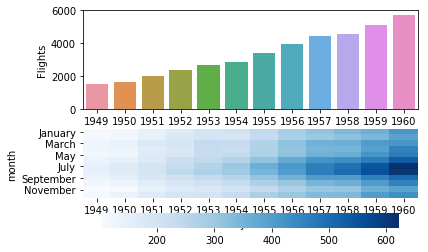

In [25]:
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = f_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights), axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)

sns.heatmap(f_dframe, cmap='Blues', ax=axis2,
            cbar_kws={'orientation':'horizontal'})

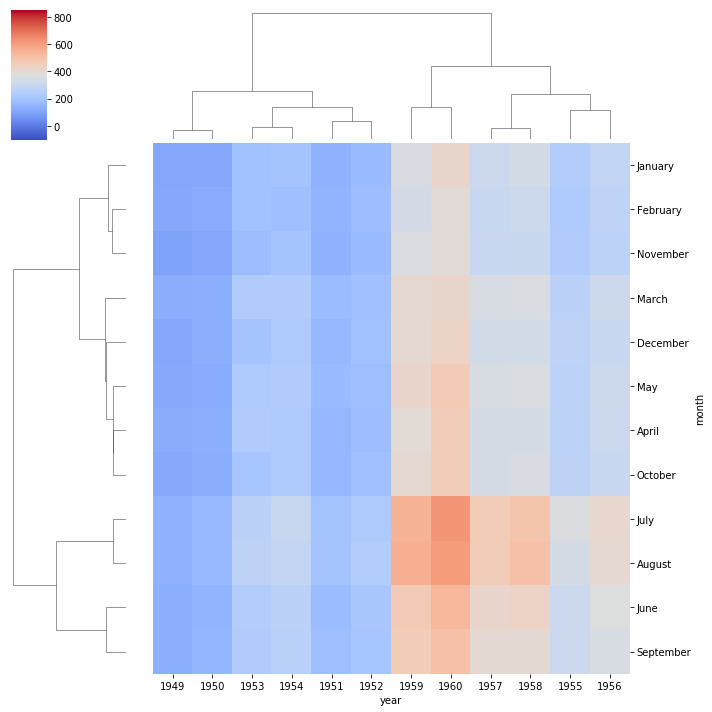

In [38]:
sns.clustermap(f_dframe, cmap='coolwarm', vmin=-100, vmax=850)

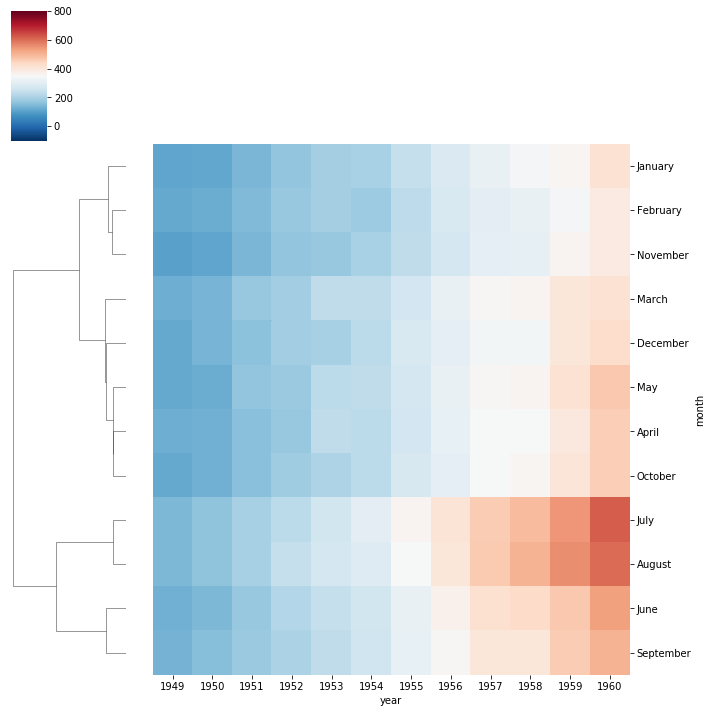

In [36]:
sns.clustermap(f_dframe, col_cluster=False, cmap="RdBu_r", 
               vmin=-100, vmax=800)

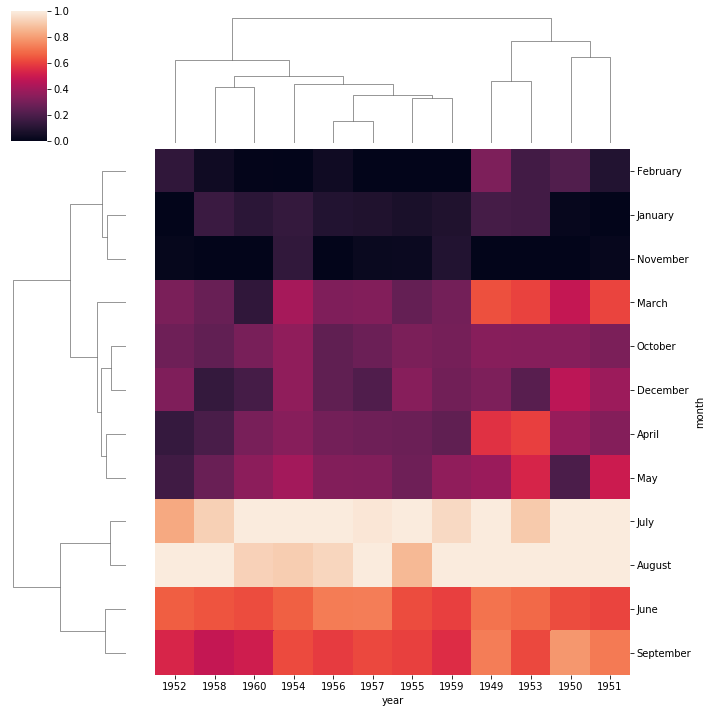

In [34]:
sns.clustermap(f_dframe, standard_scale=1)